In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [11]:
single_image = X_train[0]

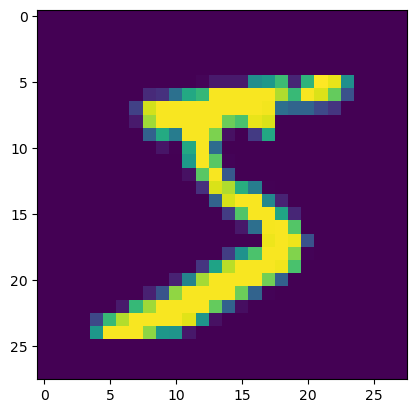

In [12]:
plt.imshow(single_image)

In [15]:
from tensorflow.keras.utils import to_categorical
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [16]:
y_cat_test = to_categorical(y_train, num_classes = 10)
y_cat_train = to_categorical(y_test, num_classes = 10)

In [18]:
X_train = X_train/255
X_test = X_test/255

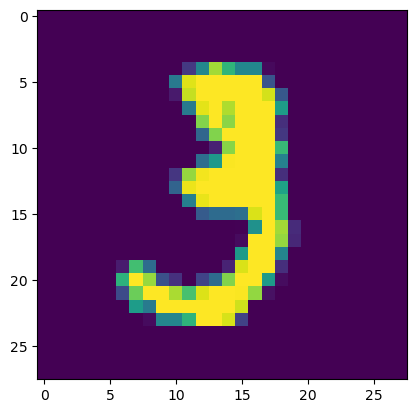

In [21]:
plt.imshow(X_train[10])